In [11]:
#Import required Libs

import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc,roc_curve

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [3]:
houseDf=pd.read_csv("kc_house_data.csv")
houseDf.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [7]:
#Explore Dataset

#Check datatype of columns
houseDf.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
#Check basic statistics of dataframe
houseDf.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Basic stat analysis : 

#From the above basis statistics it shows that the features Price / Bedroom/ Bathroom and Sqft_living have long tail to right. The mean is concentrated towards first quartile values for them.

#From the details above it was also observed that there are some observations which seems to be outliers.

#For more explorations I am checking value counts for Bedrooms below. I observe that there are fewer observations having more than 7 bedrooms 

In [26]:
#Value counts for Bedrooms feature.
houseDf["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

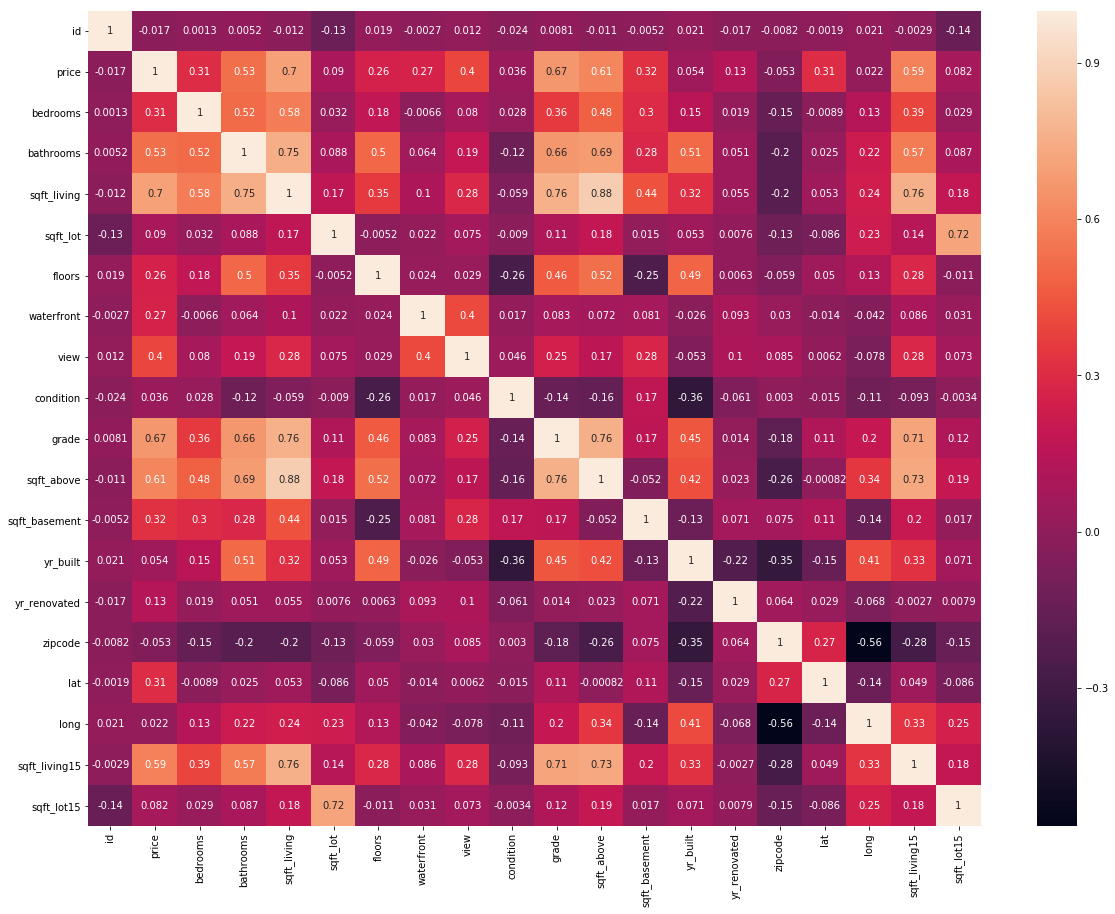

In [12]:
# Correlation

plt.figure(figsize=(20, 15))

bCorr = houseDf.corr()
sns.heatmap(bCorr, 
            xticklabels = bCorr.columns.values,
            yticklabels = bCorr.columns.values,
            annot = True);

# Correlation Analysis

From the correlation plot above we can see Price, Bedrooms, Bathrooms and Sqft_living are positively correlated featueres. This is obivious correlation.

Sqft_living feature has strong positive correlation with sqft_above feature.


Price and Bathrooms also have strong correlation with grade, sqft_above 


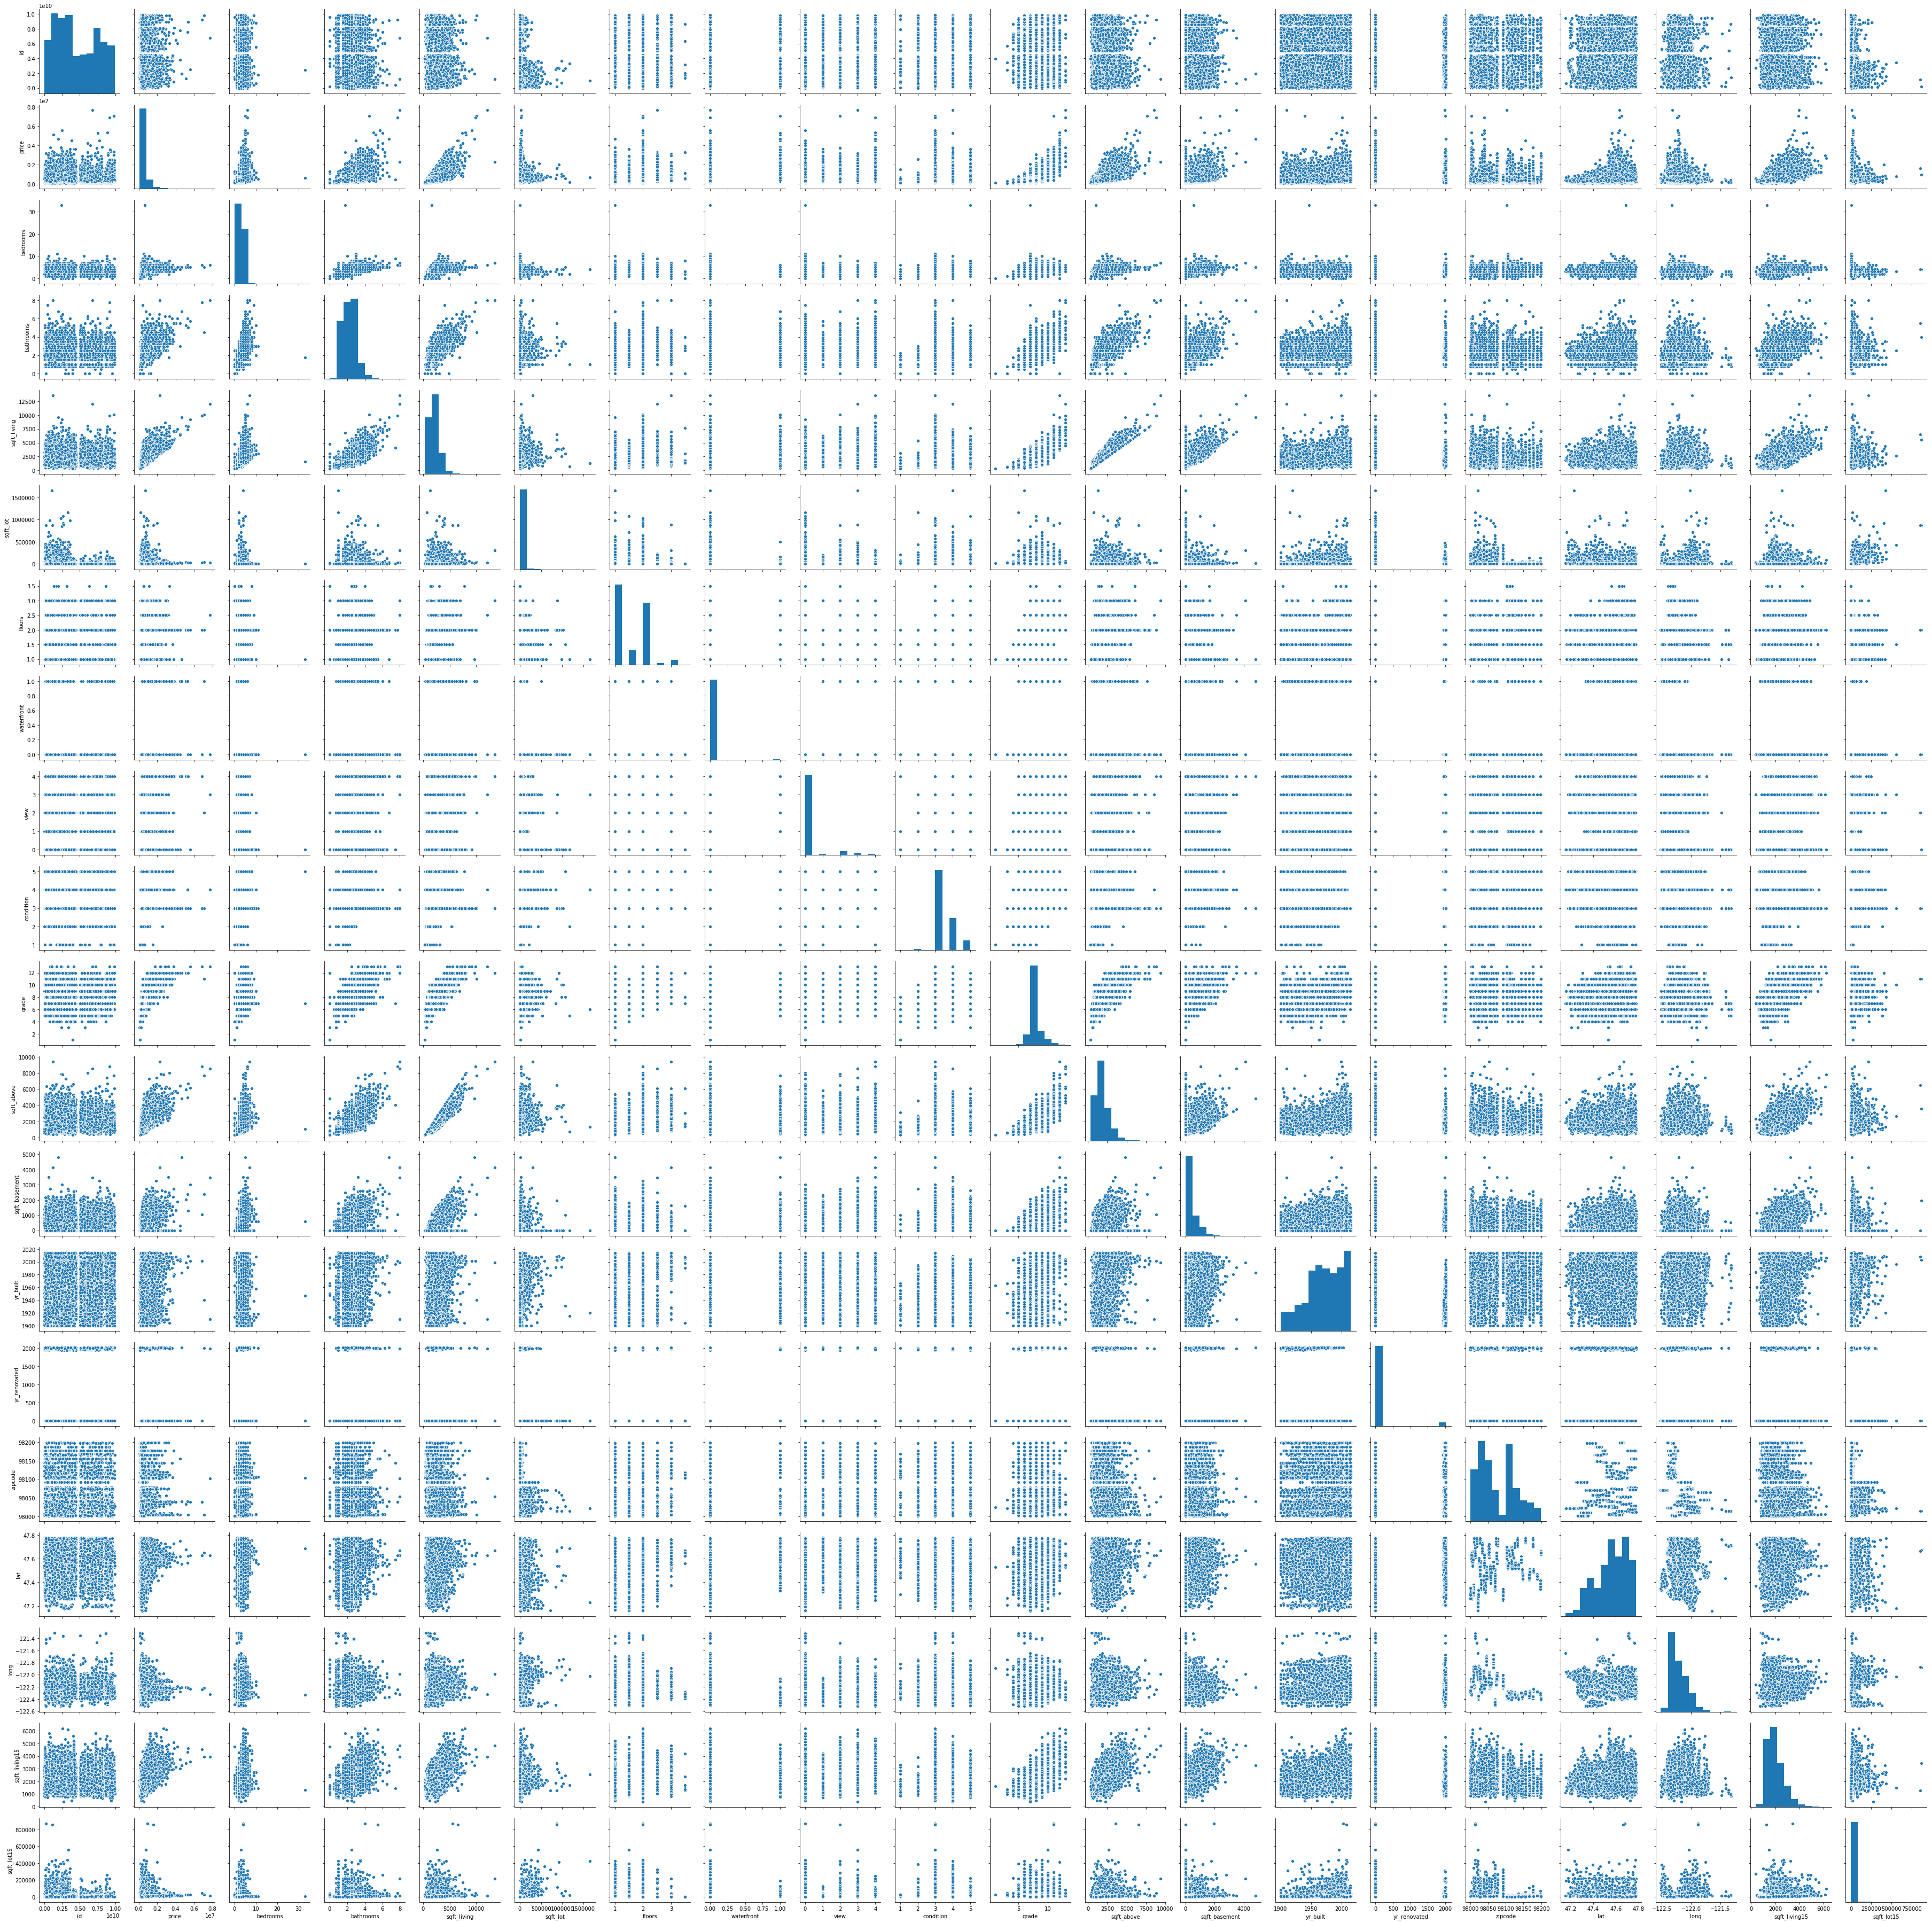

In [13]:
#Cross plots

sns.pairplot(houseDf)

# Pairplot analysis :

Price, Bedrooms, Bathrooms and sqft_living have observations highly concentrated to the left and have long tail towards right therefore the distribution is skewed toward left.  

Grade is normally distributed.

# Build Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
houseDf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
houseDf.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### Building Linear regression with first 5 features to check

In [31]:
#Get input and target
x = houseDf[['bedrooms','bathrooms','sqft_living','sqft_lot','floors']]
y = houseDf[['price']]

#Build Model
model = LinearRegression()
model.fit(x, y)

#Check Score
model.score(x, y)

0.5086682574120774

### Building Linear Regression with all features

In [32]:

x = houseDf[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = houseDf[['price']]

#Build Model
model = LinearRegression()
model.fit(x, y)

#Check Score
model.score(x, y)

0.6997471890109157

### Combining features : 
#### LivingArea = bedrooms * bathrooms * sqft_living
#### HouseView = floors * waterfront * view 
#### HouseCondition = condition * grade * sqft_above * sqft_basement * yr_built * yr_renovated
#### HouseLocation = zipcode* lat * long

In [44]:
houseDf['LivingArea']=houseDf['bedrooms']*houseDf['bathrooms']*houseDf['sqft_living']
houseDf['HouseView']=houseDf['floors']*houseDf['waterfront']*houseDf['view']
houseDf['HouseCondition']=houseDf['condition']*houseDf['grade']*houseDf['sqft_above']*houseDf['sqft_basement']*houseDf['yr_built']*houseDf['yr_renovated']
houseDf['HouseLocation']=houseDf['zipcode']*houseDf['lat']*houseDf['long']
#Adding few more combining features

houseDf['HouseArea']=houseDf['sqft_living']*houseDf['sqft_lot']*houseDf['sqft_above']*houseDf['sqft_basement']
houseDf['NoOfRooms']=houseDf['bedrooms']*houseDf['bathrooms']

In [36]:

x = houseDf[['bedrooms','bathrooms','sqft_living','LivingArea']]
y = houseDf[['price']]

#Build Model
model = LinearRegression()
model.fit(x, y)

#Check Score
model.score(x, y)

0.5292073632765354

In [45]:
x = houseDf[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','LivingArea','HouseView','HouseCondition','HouseLocation','HouseArea','NoOfRooms']]
y = houseDf[['price']]

#Build Model
model = LinearRegression()
model.fit(x, y)

#Check Score
model.score(x, y)

0.7338658477756825

### I used manual progression to check importance of features by first creating model with few features and then with all features. Followed by that I created combined features based on related features. The combined features have improved the model accuracy. Also removed attributes like lat, long in iterations. 

## Feature selection based on correlation

In [46]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

x = houseDf[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','LivingArea','HouseView','HouseCondition','HouseLocation','HouseArea','NoOfRooms']]
y = houseDf[['price']]

best_fit = SelectKBest(score_func=f_regression, k=5)

best_fit.fit_transform(x,y)


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.00000e+00, 1.18000e+03, 7.00000e+00, 1.18000e+03, 3.54000e+03],
       [2.25000e+00, 2.57000e+03, 7.00000e+00, 2.17000e+03, 1.73475e+04],
       [1.00000e+00, 7.70000e+02, 6.00000e+00, 7.70000e+02, 1.54000e+03],
       ...,
       [7.50000e-01, 1.02000e+03, 7.00000e+00, 1.02000e+03, 1.53000e+03],
       [2.50000e+00, 1.60000e+03, 8.00000e+00, 1.60000e+03, 1.20000e+04],
       [7.50000e-01, 1.02000e+03, 7.00000e+00, 1.02000e+03, 1.53000e+03]])

In [47]:
best_fit.scores_

array([ 2270.65523406,  8228.9432278 , 21001.90964063,   175.14030523,
        1525.70614265,  1650.46303578,  4050.45898116,    28.61145517,
       17360.63544119, 12514.0608974 ,  2531.50632597,    63.2290479 ,
         351.07483789,    61.34451839, 16274.65847583,  1746.93970253,
        1708.41323899,  1285.10315589,   225.3469659 ,  7868.64048285])

In [48]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'LivingArea',
       'HouseView', 'HouseCondition', 'HouseLocation', 'HouseArea',
       'NoOfRooms'],
      dtype='object')

In [53]:
# Lets choose best features based on highest scores and check the model accuracy

x = houseDf[['bathrooms','sqft_living', 'grade', 'sqft_above','LivingArea']]
y = houseDf[['price']]

#Build Model
model = LinearRegression()
model.fit(x, y)

#Check Score
model.score(x, y)

0.5679981681190518

### We see that the feature selection based on regression (with 5 features), model is not performing very well. I will try using Forward selection method

### Building Model using Forward Selection

In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [56]:
x = houseDf[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','LivingArea','HouseView','HouseCondition','HouseLocation','HouseArea','NoOfRooms']]
y = houseDf[['price']]


In [55]:
model = LinearRegression()

In [71]:
sfs = SequentialFeatureSelector(model, 
                                k_features=14, 
                                forward=True,
                                cv=10)

In [72]:
sfs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=10,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=True, k_features=14, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring=None, verbose=0)

In [73]:
sfs.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48319936, 0.50185894, 0.47088461, 0.51367443, 0.45344639,
         0.50121587, 0.5015115 , 0.48919046, 0.49376918, 0.48544901]),
  'avg_score': 0.4894199756705168,
  'feature_names': ('sqft_living',),
  'ci_bound': 0.012292843310146594,
  'std_dev': 0.016551270984713342,
  'std_err': 0.00551709032823778},
 2: {'feature_idx': (2, 17),
  'cv_scores': array([0.55150086, 0.56835544, 0.55021789, 0.57638899, 0.54930145,
         0.57953776, 0.58764511, 0.57241712, 0.5760804 , 0.59982746]),
  'avg_score': 0.5711272487153061,
  'feature_names': ('sqft_living', 'HouseLocation'),
  'ci_bound': 0.01180798261297087,
  'std_dev': 0.015898447176069454,
  'std_err': 0.005299482392023151},
 3: {'feature_idx': (2, 15, 17),
  'cv_scores': array([0.61797745, 0.619017  , 0.58601454, 0.61324114, 0.57808162,
         0.61107279, 0.60853495, 0.59424466, 0.60305723, 0.63778184]),
  'avg_score': 0.6069023249808286,
  'feature_names': ('sqft_living', 'HouseView'

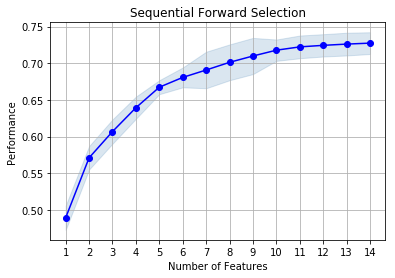

In [74]:
#Visualize 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs.get_metric_dict())

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

#### I reiterated with different values for number of features(k_features) to check the performance graph.  

In [75]:
#These are key features
sfs.k_feature_names_, sfs.k_feature_idx_

(('bedrooms',
  'sqft_living',
  'floors',
  'view',
  'condition',
  'grade',
  'yr_built',
  'zipcode',
  'LivingArea',
  'HouseView',
  'HouseCondition',
  'HouseLocation',
  'HouseArea',
  'NoOfRooms'),
 (0, 2, 4, 6, 7, 8, 11, 13, 14, 15, 16, 17, 18, 19))

In [76]:
# Build model and check accuracy
from sklearn.model_selection import cross_val_score, KFold

selected_x = x[[feature for feature in sfs.k_feature_names_]]
model = LinearRegression()
kfold = KFold(n_splits=5)
result = cross_val_score(model, selected_x, y, cv=kfold)
result.mean()

0.7274098863595901

## We observe that the using forward selection (with 14 features) we have achieved good accuracy. 

### We also have somewhat more accuracy when we used combined features 